# Canonical Economic Models

You will learn how to solve **two canonical economic models**:

1. The **overlapping generations (OLG) model**
2. The **Ramsey model**

**Main take-away:** Hopefully inspiration to analyze such models on your own.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import optimize

# plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})

# models
from OLGModel import OLGModelClass
from RamseyModel import RamseyModelClass

# OverLapping Generations (OLG) model

## Model description

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population is constant. A life consists of
two periods, *young* and *old*.

**Households:** As young a household supplies labor exogenously, $L_{t}=1$, and earns a after tax wage $(1-\tau_w)w_{t}$. Consumption as young and old
are denoted by $C_{1t}$ and $C_{2t+1}$. The after-tax return on saving is $(1-\tau_{r})r_{t+1}$. Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{1t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$,
and hires labor $E_{t}$ at the wage rate $w_{t}$. Firms have access
to the production function
    
$$
\begin{aligned}
Y_{t}=F(K_{t-1},E_{t})=(\alpha K_{t-1}^{-\theta}+(1-\alpha)E_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}E_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** Choose public consumption, $G_{t}$, and tax rates $\tau_w \in [0,1]$ and $\tau_r \in [0,1]$. Total tax revenue is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}   
\end{aligned}
$$
    
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$
       
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $E_{t}=L_{t}=1$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

**For more details on the OLG model:** See chapter 3-4 [here](https://web.econ.ku.dk/okocg/VM/VM-general/Material/Chapters-VM.htm).

## Solution and simulation

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},E_{t})=\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{E}(K_{t-1},E_{t})=(1-\alpha)E_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.  *Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{E}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1})+\tau_{w}w_{t}\\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & =s_{t}(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

**Solution algorithm:** Simulate forward choosing $s_{t}$ so
that we always have

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Implementation:**

1. Use a bisection root-finder to determine $s_t$
2. Low $s_t$: A lot of consumption today. Low marginal utility. LHS < RHS.
3. High $s_t$: Little consumption today. High marginal utility. LHS > RHS.
4. Problem: Too low $s_t$ might not be feasible if $B_t > 0$.

**Note:** Never errors in the Euler-equation due to *perfect foresight*.

**Question:** Are all the requirements for the equilibrium satisfied?

## Test case

1. Production is Cobb-Douglas ($\theta = 0$)
2. Utility is logarithmic ($\sigma = 1$)
3. The government is not doing anything ($\tau_w=\tau_r=0$, $T_t = G_t = 0$ and $B_t = 0$) 

**Analytical steady state:** It can be proven

$$ \lim_{t\rightarrow\infty} K_t = \left(\frac{1-\alpha}{1+1/\beta}\right)^{\frac{1}{1-\alpha}} $$

**Setup:**

In [2]:
model = OLGModelClass()
par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# b. households
par.sigma = 1.0

# c. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# d. initial values
K_ss = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))
par.K_lag_ini = 0.1*K_ss

initializing the model:
calling .setup()
calling .allocate()


### Simulate first period manually

In [3]:
from OLGModel import simulate_before_s, simulate_after_s, find_s_bracket, calc_euler_error

**Make a guess:**

In [4]:
s_guess = 0.50

**Evaluate first period:**

In [5]:
# a. initialize
sim.K_lag[0] = par.K_lag_ini
sim.B_lag[0] = par.B_lag_ini

simulate_before_s(par,sim,t=0)
print(f'{sim.C2[0] = : .4f}')

simulate_after_s(par,sim,s=s_guess,t=0)
print(f'{sim.C1[0] = : .4f}')

simulate_before_s(par,sim,t=1)
print(f'{sim.C2[1] = : .4f}')
print(f'{sim.rt[1] = : .4f}')

LHS_Euler = sim.C1[0]**(-par.sigma)
RHS_Euler = (1+sim.rt[1])*par.beta * sim.C2[1]**(-par.sigma)
print(f'euler-error = {LHS_Euler-RHS_Euler:.8f}')

sim.C2[0] =  0.0973
sim.C1[0] =  0.1035
sim.C2[1] =  0.2036
sim.rt[1] =  0.9683
euler-error = 2.76183762


**Implemented as function:**

In [6]:
euler_error = calc_euler_error(s_guess,par,sim,t=0)
print(f'euler-error = {euler_error:.8f}')

euler-error = 2.76183762


**Find bracket to search in:**

In [7]:
s_min,s_max = find_s_bracket(par,sim,t=0,do_print=True);

euler-error for s =   0.99999999 = 483321577.17005599
euler-error for s =   0.50000000 =   2.76183762
euler-error for s =   0.25000001 =  -7.36489999
bracket to search in with opposite signed errors:
[  0.25000001-  0.50000000]


**Call root-finder:**

In [8]:
obj = lambda s: calc_euler_error(s,par,sim,t=0)
result = optimize.root_scalar(obj,bracket=(s_min,s_max),method='bisect')
print(result)

      converged: True
           flag: 'converged'
 function_calls: 39
     iterations: 37
           root: 0.41666666666653274


**Check result:**

In [9]:
euler_error = calc_euler_error(result.root,par,sim,t=0)
print(f'euler-error = {euler_error:.8f}')

euler-error = -0.00000000


### Full simulation

In [10]:
model.simulate()

simulation done in 0.03 secs


**Check euler-errors:**

In [11]:
for t in range(5):
    LHS_Euler = sim.C1[t]**(-par.sigma)
    RHS_Euler = (1+sim.rt[t+1])*par.beta * sim.C2[t+1]**(-par.sigma)
    print(f't = {t:2d}: euler-error = {LHS_Euler-RHS_Euler:.8f}')

t =  0: euler-error = -0.00000000
t =  1: euler-error = -0.00000000
t =  2: euler-error = -0.00000000
t =  3: euler-error = -0.00000000
t =  4: euler-error = -0.00000000


**Plot and check with analytical solution:**

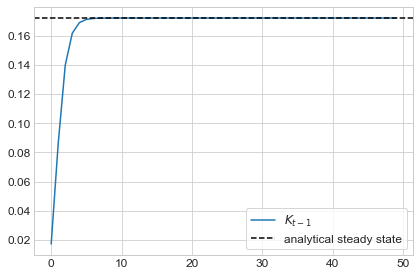

In [12]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}$')
ax.axhline(K_ss,ls='--',color='black',label='analytical steady state')
ax.legend(frameon=True)
fig.tight_layout()
K_lag_old = model.sim.K_lag.copy()

**Task:** Test if the starting point matters?

**Additional check:** Not much should change with only small parameter changes. 

In [13]:
# a. production (close to cobb-douglas)
par.production_function = 'ces'
par.theta = 0.001

# b. household (close to logarithmic)
par.sigma = 1.1

# c. goverment (weakly active)
par.tau_w = 0.001
par.tau_r = 0.001

# d. simulate
model.simulate()

simulation done in 0.03 secs


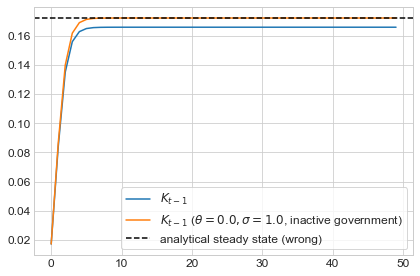

In [14]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}$')
ax.plot(K_lag_old,label=r'$K_{t-1}$ ($\theta = 0.0, \sigma = 1.0$, inactive government)')
ax.axhline(K_ss,ls='--',color='black',label='analytical steady state (wrong)')
ax.legend(frameon=True)
fig.tight_layout()

## Active government

In [15]:
model = OLGModelClass()
par = model.par
sim = model.sim

initializing the model:
calling .setup()
calling .allocate()


**Baseline:**

In [16]:
model.simulate()

simulation done in 0.02 secs


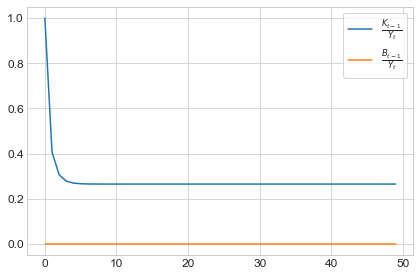

In [17]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(sim.K_lag/(sim.Y),label=r'$\frac{K_{t-1}}{Y_t}$')
ax.plot(sim.B_lag/(sim.Y),label=r'$\frac{B_{t-1}}{Y_t}$')
ax.legend(frameon=True)
fig.tight_layout()

**Remember steady state:**

In [18]:
K_ss = sim.K_lag[-1]
B_ss = sim.B_lag[-1]
G_ss = sim.G[-1]

**Spending spree of 5% in $T=3$ periods:**

In [19]:
# a. start from steady state
par.K_lag_ini = K_ss
par.B_lag_ini = B_ss

# b. spending spree
T0 = 0
dT = 3
sim.G[T0:T0+dT] = 1.05*G_ss
sim.balanced_budget[:T0] = True #G adjusts
sim.balanced_budget[T0:T0+dT] = False # B adjusts
sim.balanced_budget[T0+dT:] = True # G adjusts

**Simulate:**

In [20]:
model.simulate()

simulation done in 0.03 secs


**Crowding-out of capital:**

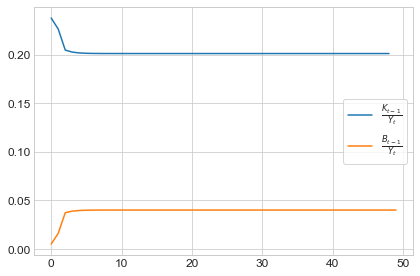

In [21]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(sim.K/(sim.Y),label=r'$\frac{K_{t-1}}{Y_t}$')
ax.plot(sim.B/(sim.Y),label=r'$\frac{B_{t-1}}{Y_t}$')
ax.legend(frameon=True)
fig.tight_layout()

**Question:** Would the households react today if the spending spree is say 10 periods in the future? 

## Getting an overview

1. Spend 3 minutes looking at `OLGModel.py`
2. Write one question at [https://b.socrative.com/login/student/](https://b.socrative.com/login/student/) with `ROOM=NUMECON`

## Potential analysis and extension

**Potential analysis:**

1. Over-accumulation of capital relative to golden rule?
2. Calibration to actual data
3. Generational inequality
4. Multiple equilibria

**Extensions:**

1. Add population and technology growth
2. More detailed tax and transfer system
3. Utility and productive effect of government consumption/investment
4. Endogenous labor supply
5. Bequest motive
6. Uncertain returns on capital
7. Additional assets (e.g. housing)
8. More than two periods in the life-cycle (life-cycle)
9. More than one dynasty (cross-sectional inequality dynamics)

# Ramsey model

... also called the Ramsey-Cass-Koopman model.

## Model descripton

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics::** Population is constant. Everybody lives forever.

**Household:** Households supply labor exogenously, $L_{t}=1$, and earns a wage $w_{t}$. The return on saving is $r_{t+1}$. Utility is 

$$
\begin{aligned}
U & =\max_{\{C_{t}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}\frac{C_{t}^{1-\sigma}}{1-\sigma},\beta\in(0,1),\sigma>0\\
 & \text{s.t.}\\
 & M_{t}=(1+r_{t})N_{t-1}+w_{t}\\
 & N_{t}=M_{t}-C_{t}
\end{aligned}
$$

where $M_{t}$ is cash-on-hand and $N_{t}$ is end-of-period assets.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$
and hires labor $E_{t}$ at the wage rate $w_{t}$. Firms have access
to the production function
    
$$
\begin{aligned}
Y_{t}= F(K_{t-1},E_{t})=A_t(\alpha K_{t-1}^{-\theta}+(1-\alpha)E_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1),A_t>0
\end{aligned}
$$

Profits are

$$
\begin{aligned}
\Pi_{t}=Y_{t}-W_{t}E_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. Labor market clear: $E_{t}=L_{t}=1$
4. Goods market clear: $Y_{t}=C_{t}+I_{t}$
5. Asset market clear: $N_{t}=K_{t}$ and $r_{t}=r_{t}^{k}-\delta$
6. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & = F_{K}(K_{t-1},E_{t})=A_t \alpha K_{t-1}^{-\theta-1}Y_{t}^{-1}\\
w_{t} & = F_{E}(K_{t-1},E_{t})=A_t (1-\alpha)E_{t}^{-\theta-1}Y_{t}^{-1}
\end{aligned}
$$

**Implication of utility maximization:** From FOCs

$$
\begin{aligned}
C_{t}^{-\sigma}=\beta(1+r_{t+1})C_{t+1}^{-\sigma}
\end{aligned}
$$

**Solution algorithm:** 

We can summarize the model in the **non-linear equation system**

$$
\begin{aligned}
\boldsymbol{H}(\boldsymbol{K},\boldsymbol{C},K_{-1})=\left[\begin{array}{c}
H_{0}\\
H_{1}\\
\begin{array}{c}
\vdots\end{array}
\end{array}\right]=\left[\begin{array}{c}
0\\
0\\
\begin{array}{c}
\vdots\end{array}
\end{array}\right]
\end{aligned}
$$

where $\boldsymbol{K} = [K_0,K_1\dots]$, $\boldsymbol{C} = [C_0,C_1\dots]$, and

$$
\begin{aligned}
H_{t}
=\left[\begin{array}{c}
C_{t}^{-\sigma}-\beta(1+r_{t+1})C_{t+1}^{-\sigma}\\
K_{t}-[(1-\delta)K_{t-1}+Y_t-C_{t}]
\end{array}\right]
=\left[\begin{array}{c}
C_{t}^{-\sigma}-\beta(1+F_{K}(K_{t},1))C_{t+1}^{-\sigma}\\
K_{t}-[(1-\delta)K_{t-1} + F(K_{t-1},1)-C_{t}])
\end{array}\right]
\end{aligned}
$$

**Path:** We refer to $\boldsymbol{K}$ and $\boldsymbol{C}$ as *transition paths*.

**Implementation:** We solve this equation system in **two steps**:

1. Assume all variables are in steady  state after some **truncation horizon**.
1. Calculate the numerical **jacobian** of $\boldsymbol{H}$ wrt. $\boldsymbol{K}$
and $\boldsymbol{C}$ around the steady state
2. Solve the equation system using a **hand-written Broyden-solver**

**Note:** The equation system can also be solved directly using `scipy.optimize.root`.

**Remember:** The jacobian is just a gradient. I.e. the matrix of what the implied errors are in $\boldsymbol{H}$ when a *single* $K_t$ or $C_t$ change.

## Solution

In [22]:
model = RamseyModelClass()
par = model.par
ss = model.ss
path = model.path

initializing the model:
calling .setup()
calling .allocate()


**Find steady state:** 

1. Target steady-state capital-output ratio, $K_{ss}/Y_{ss}$ of 4.0.
2. Force steady-state output $Y_{ss} = 1$.
3. Adjust $\beta$ and $A_{ss}$ to achieve this.

In [23]:
model.find_steady_state(KY_ss=4.0)

Y_ss = 1.0000
K_ss/Y_ss = 4.0000
rk_ss = 0.0750
r_ss = 0.0250
w_ss = 0.7000
A = 0.6598
beta = 0.9756


**Test that errors and the path are 0:**

In [24]:
# a. set initial value
par.K_lag_ini = ss.K

# b. set path
path.A[:] = ss.A
path.C[:] = ss.C
path.K[:] = ss.K

# c. check errors
errors_ss = model.evaluate_path_errors()
assert np.allclose(errors_ss,0.0)

**Calculate jacobian around steady state:**

In [25]:
model.calculate_jacobian()

**Solve:**

In [26]:
par.K_lag_ini = 0.50*ss.K # start away from steady state
model.solve() # find transition path

 it =   0 -> max. abs. error =   2.08774760
 it =   1 -> max. abs. error =   0.03407048
 it =   2 -> max. abs. error =   0.04084472
 it =   3 -> max. abs. error =   0.00495803
 it =   4 -> max. abs. error =   0.01354190
 it =   5 -> max. abs. error =   0.01209108
 it =   6 -> max. abs. error =   0.00397825
 it =   7 -> max. abs. error =   0.00192043
 it =   8 -> max. abs. error =   0.00097483
 it =   9 -> max. abs. error =   0.00009018
 it =  10 -> max. abs. error =   0.00010485
 it =  11 -> max. abs. error =   0.00000476
 it =  12 -> max. abs. error =   0.00000737
 it =  13 -> max. abs. error =   0.00000045
 it =  14 -> max. abs. error =   0.00000038
 it =  15 -> max. abs. error =   0.00000002
 it =  16 -> max. abs. error =   0.00000002
 it =  17 -> max. abs. error =   0.00000000


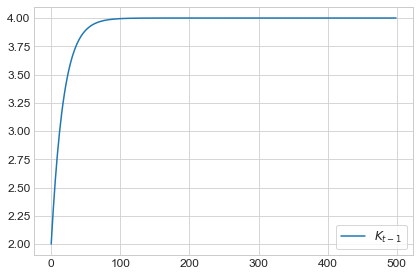

In [27]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(path.K_lag,label=r'$K_{t-1}$')
ax.legend(frameon=True)
fig.tight_layout()

## Comparison with scipy solution

**Note:** scipy computes the jacobian internally

In [28]:
model_scipy = RamseyModelClass()
model_scipy.par.solver = 'scipy'
model_scipy.find_steady_state(KY_ss=4.0)
model_scipy.par.K_lag_ini = 0.50*model_scipy.ss.K
model_scipy.path.A[:] = model_scipy.ss.A
model_scipy.solve()

initializing the model:
calling .setup()
calling .allocate()
Y_ss = 1.0000
K_ss/Y_ss = 4.0000
rk_ss = 0.0750
r_ss = 0.0250
w_ss = 0.7000
A = 0.6598
beta = 0.9756


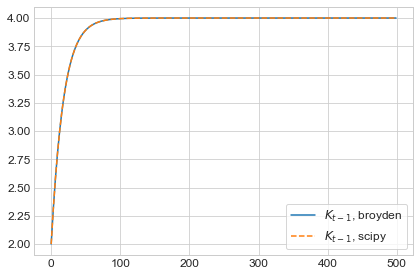

In [29]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(path.K_lag,label=r'$K_{t-1}$, broyden')
ax.plot(model_scipy.path.K_lag,ls='--',label=r'$K_{t-1}$, scipy')
ax.legend(frameon=True)
fig.tight_layout()

## Persistent technology shock

**Shock:**

In [30]:
par.K_lag_ini = ss.K # start from steady state
path.A[:] = 0.95**np.arange(par.Tpath)*0.1*ss.A + ss.A # shock path

**Terminology:** This is called an MIT-shock. Households do not expect shocks. Know the full path of the shock when it arrives. Continue to believe no future shocks will happen.

**Solve:**

In [31]:
model.solve()

 it =   0 -> max. abs. error =   0.10000000
 it =   1 -> max. abs. error =   0.00096551
 it =   2 -> max. abs. error =   0.00004937
 it =   3 -> max. abs. error =   0.00000248
 it =   4 -> max. abs. error =   0.00000040
 it =   5 -> max. abs. error =   0.00000006
 it =   6 -> max. abs. error =   0.00000000


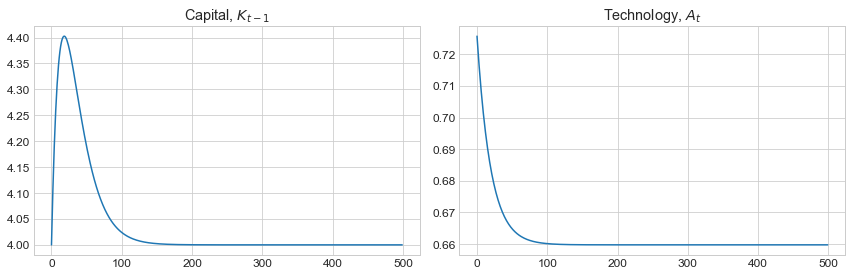

In [32]:
fig = plt.figure(figsize=(2*6,6/1.5))

ax = fig.add_subplot(1,2,1)
ax.set_title('Capital, $K_{t-1}$')
ax.plot(path.K_lag)

ax = fig.add_subplot(1,2,2)
ax.plot(path.A)
ax.set_title('Technology, $A_t$')

fig.tight_layout()

**Question:** Could a much more persistent shock be problematic?

## Future persistent technology shock

**Shock happing after period $H$:**

In [33]:
par.K_lag_ini = ss.K # start from steady state

# shock
H = 50
path.A[:] = ss.A
path.A[H:] = 0.95**np.arange(par.Tpath-H)*0.1*ss.A + ss.A

**Solve:**

In [34]:
model.solve()

 it =   0 -> max. abs. error =   0.10000000
 it =   1 -> max. abs. error =   0.00267237
 it =   2 -> max. abs. error =   0.00015130
 it =   3 -> max. abs. error =   0.00000241
 it =   4 -> max. abs. error =   0.00000025
 it =   5 -> max. abs. error =   0.00000002
 it =   6 -> max. abs. error =   0.00000000


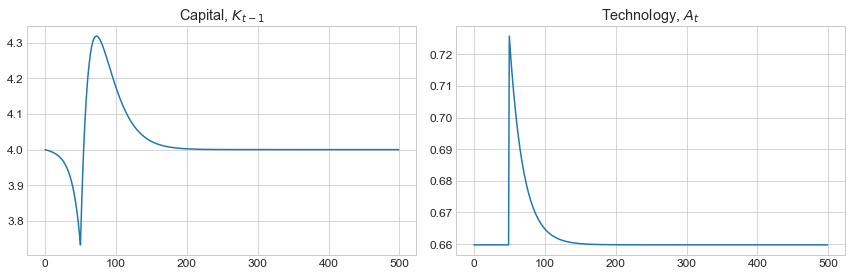

In [35]:
fig = plt.figure(figsize=(2*6,6/1.5))

ax = fig.add_subplot(1,2,1)
ax.set_title('Capital, $K_{t-1}$')
ax.plot(path.K_lag)

ax = fig.add_subplot(1,2,2)
ax.plot(path.A)
ax.set_title('Technology, $A_t$')

fig.tight_layout()

**Take-away:** Households are forward looking and responds before the shock hits.

## Getting an overview

1. Spend 3 minutes looking at `RamseyModel.py`
2. Write one question at [https://b.socrative.com/login/student/](https://b.socrative.com/login/student/) with `ROOM=NUMECON`

## Potential analysis and extension

**Potential analysis:**

1. Different shocks (e.g. discount factor)
2. Multiple shocks
3. Permanent shocks ($\rightarrow$ convergence to new steady state)
4. Transition speed

**Extensions:**

1. Add a government and taxation
2. Endogenous labor supply
3. Additional assets (e.g. housing)
4. Add nominal rigidities (New Keynesian)

# Further perspectives

**The next steps beyond this course:** 

1. The **Bewley-Huggett-Aiyagari** model. A multi-period OLG model or Ramsey model with households making decisions *under uncertainty and borrowing constraints* as in lecture 11 under "dynamic optimization". Such heterogenous agent models are used in state-of-the-art research, see [Quantitative Macroeconomics with Heterogeneous Households](https://www.annualreviews.org/doi/abs/10.1146/annurev.economics.050708.142922). 

2. Further adding nominal rigidities this is called a **Heterogenous Agent New Keynesian (HANK)** model. See [Macroeconomics with HANK models](https://drive.google.com/file/d/16Qq7NJ_AZh5NmjPFSrLI42mfT7EsCUeH/view).

3. This extends the **Representative Agent New Keynesian (RANK)** model, which itself is a Ramsey model extended with nominal rigidities. 

4. The final frontier is including **aggregate risk**, which either requires linearization or using a **Krussell-Smith method**. Solving the model in *sequence-space* as we did with the Ramsey model is a frontier method (see [here](https://github.com/shade-econ/sequence-jacobian/#sequence-space-jacobian)).





**Next lecture:** Agent Based Models